In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import bamboolib as bam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats


In [2]:
df=pd.read_csv("C:/Users/manis/Downloads/car.csv")

In [3]:
cleaned_column_names = (df.columns
                        .str.strip()
                        .str.replace('((?<=[a-z0-9])[A-Z]|(?!^)[A-Z](?=[a-z]))', r'_\1')
                        .str.lower()
                        .str.replace('[ _-]+', '_')
                        .str.replace('[}{)(><.!?\\\\:;,-]', ''))
df.columns = cleaned_column_names
df = df.dropna()
df = df.drop_duplicates(keep='first')
df = df.replace('?', np.nan)
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'], downcast='integer', errors='coerce')
df = df.drop(columns=['model_year'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,us_made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [26]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int16
weight            int64
acceleration    float64
us_made           int64
dtype: object


<AxesSubplot:>

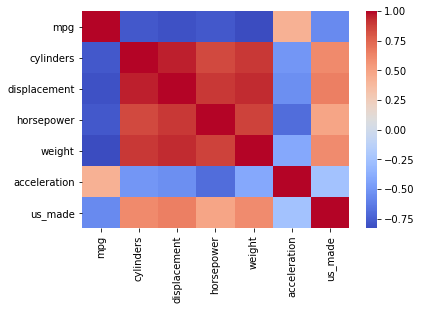

In [27]:
# Compute the correlation matrix
import seaborn as sns
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, cmap='coolwarm')

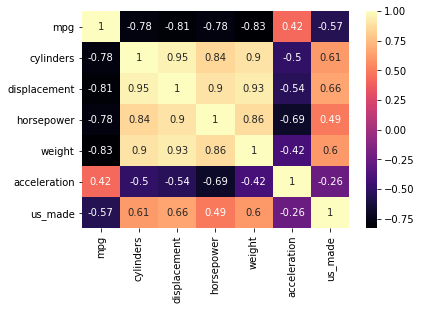

In [28]:
#Plotting Correlation Matrix for dataset
from matplotlib import pyplot as plt
corr = df.corr()
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True, cmap="magma")
plt.show()

Text(0.5, 1.0, 'Horsepower vs Mpg')

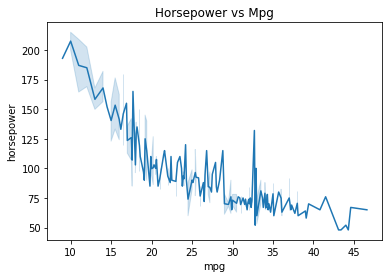

In [29]:
a=sns.lineplot(df.mpg, df.horsepower)
plt.title('Horsepower vs Mpg')

Text(0.5, 1.0, 'Weight vs Mpg')

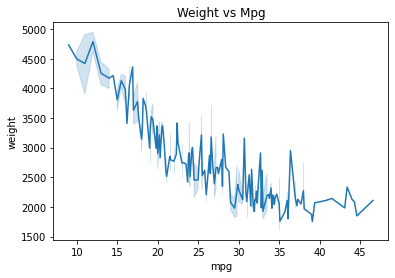

In [30]:
a=sns.lineplot(df.mpg, df.weight)
plt.title('Weight vs Mpg')

Text(0.5, 1.0, 'displacement vs Mpg')

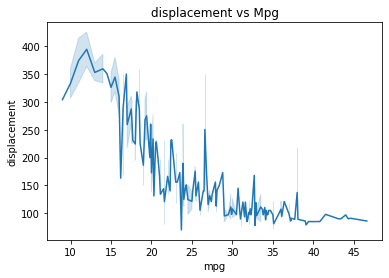

In [32]:
a=sns.lineplot(df.mpg, df.displacement)
plt.title('displacement vs Mpg')

Text(0.5, 1.0, 'acceleration vs Mpg')

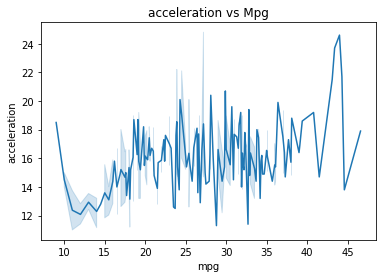

In [33]:
a=sns.lineplot(df.mpg, df.acceleration)
plt.title('acceleration vs Mpg')

In [34]:
#assisgning dependent and independent variables
y=df[['mpg']]
x=df.drop(columns=['mpg'])

In [35]:
#split the data into test and train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)

In [36]:
#linear regression model
x2=sm.add_constant(x_train)
est=sm.OLS(y_train,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           4.30e-77
Time:                        19:00:30   Log-Likelihood:                -826.08
No. Observations:                 294   AIC:                             1666.
Df Residuals:                     287   BIC:                             1692.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           51.6787      3.161     16.351   

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Compute the VIF for each variable
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Print the VIF values
print(vif)


      variables         VIF
0     cylinders  102.077978
1  displacement   84.442369
2    horsepower   46.550258
3        weight  137.472555
4  acceleration   28.252314
5       us_made    5.111788


#Optimizing the model

In [46]:
#dropping  cylinders as VIF score and p value is very high
#assisgning dependent and independent variables
y1=df[['mpg']]
x1=df.drop(columns=['mpg','cylinders'])

In [47]:
#split the data into test and train 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=11)

In [48]:
# Build the linear regression model
x3=sm.add_constant(x1_train)
model=sm.OLS(y1_train,x3)
ln_model=model.fit()
print(ln_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           6.97e-78
Time:                        19:26:29   Log-Likelihood:                -826.84
No. Observations:                 294   AIC:                             1666.
Df Residuals:                     288   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           49.9474      2.825     17.679   

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Compute the VIF for each variable
vif = pd.DataFrame()
vif['variables'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

# Print the VIF values
print(vif)


      variables         VIF
0  displacement   55.257509
1    horsepower   44.792392
2        weight  136.468198
3  acceleration   20.574745
4       us_made    5.100861


In [50]:
#dropping  cylinders as VIF score and p value is very high
#assisgning dependent and independent variables
y1=df[['mpg']]
x1=df.drop(columns=['mpg','cylinders','displacement'])

In [51]:
#split the data into test and train 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=11)

In [52]:
# Build the linear regression model
x3=sm.add_constant(x1_train)
model=sm.OLS(y1_train,x3)
ln_model=model.fit()
print(ln_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           8.44e-79
Time:                        19:30:26   Log-Likelihood:                -827.42
No. Observations:                 294   AIC:                             1665.
Df Residuals:                     289   BIC:                             1683.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           49.1592      2.728     18.020   

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Compute the VIF for each variable
vif = pd.DataFrame()
vif['variables'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

# Print the VIF values
print(vif)


      variables        VIF
0    horsepower  41.690534
1        weight  77.112615
2  acceleration   9.798859
3       us_made   4.233886


In [65]:
#dropping  cylinders as VIF score and p value is very high
#assisgning dependent and independent variables
y1=df[['mpg']]
x1=df.drop(columns=['mpg','cylinders','displacement','acceleration'])

In [66]:
#split the data into test and train 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=11)

In [67]:
# Build the linear regression model
x3=sm.add_constant(x1_train)
model=sm.OLS(y1_train,x3)
ln_model=model.fit()
print(ln_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     245.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           2.91e-79
Time:                        19:43:19   Log-Likelihood:                -829.23
No. Observations:                 294   AIC:                             1666.
Df Residuals:                     290   BIC:                             1681.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2993      0.919     48.225      0.0

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Compute the VIF for each variable
vif = pd.DataFrame()
vif['variables'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

# Print the VIF values
print(vif)


    variables        VIF
0  horsepower  32.256387
1      weight  35.595811
2     us_made   3.872080
